<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Backtrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Backtrader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger les données Apple
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')


# Ça fonctionne même si yfinance renvoie un DataFrame multi-niveaux
df.columns = df.columns.droplevel('Ticker')
df.dropna(inplace=True)
df.head()

/tmp/ipython-input-3251430220.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [ ]:
# 2. Calcul des moyennes mobiles
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()


In [ ]:
# 3. Détection des signaux
df['Signal'] = 0
df.loc[df['SMA20'] > df['SMA50'], 'Signal'] = 1
df.loc[df['SMA20'] < df['SMA50'], 'Signal'] = 0
df['Position'] = df['Signal'].diff()

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal,Position
Date,,,,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,NaN,NaN,0,NaN
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800,NaN,NaN,0,0.0
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,NaN,NaN,0,0.0
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000,NaN,NaN,0,0.0
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,NaN,NaN,0,0.0


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal,Position
Date,,,,,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,244.437349,234.713735,1,0.0
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,245.700803,235.255513,1,0.0
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,246.895920,235.762829,1,0.0
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,247.926434,236.242965,1,0.0
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500,248.668145,236.648090,1,0.0


In [ ]:
df[['Close', 'SMA20', 'SMA50', 'Signal', 'Position']].tail()

Price,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2024-12-23,254.655716,244.437349,234.713735,1,0.0
2024-12-24,257.578674,245.700803,235.255513,1,0.0
2024-12-26,258.396667,246.895920,235.762829,1,0.0
2024-12-27,254.974930,247.926434,236.242965,1,0.0
2024-12-30,251.593079,248.668145,236.648090,1,0.0


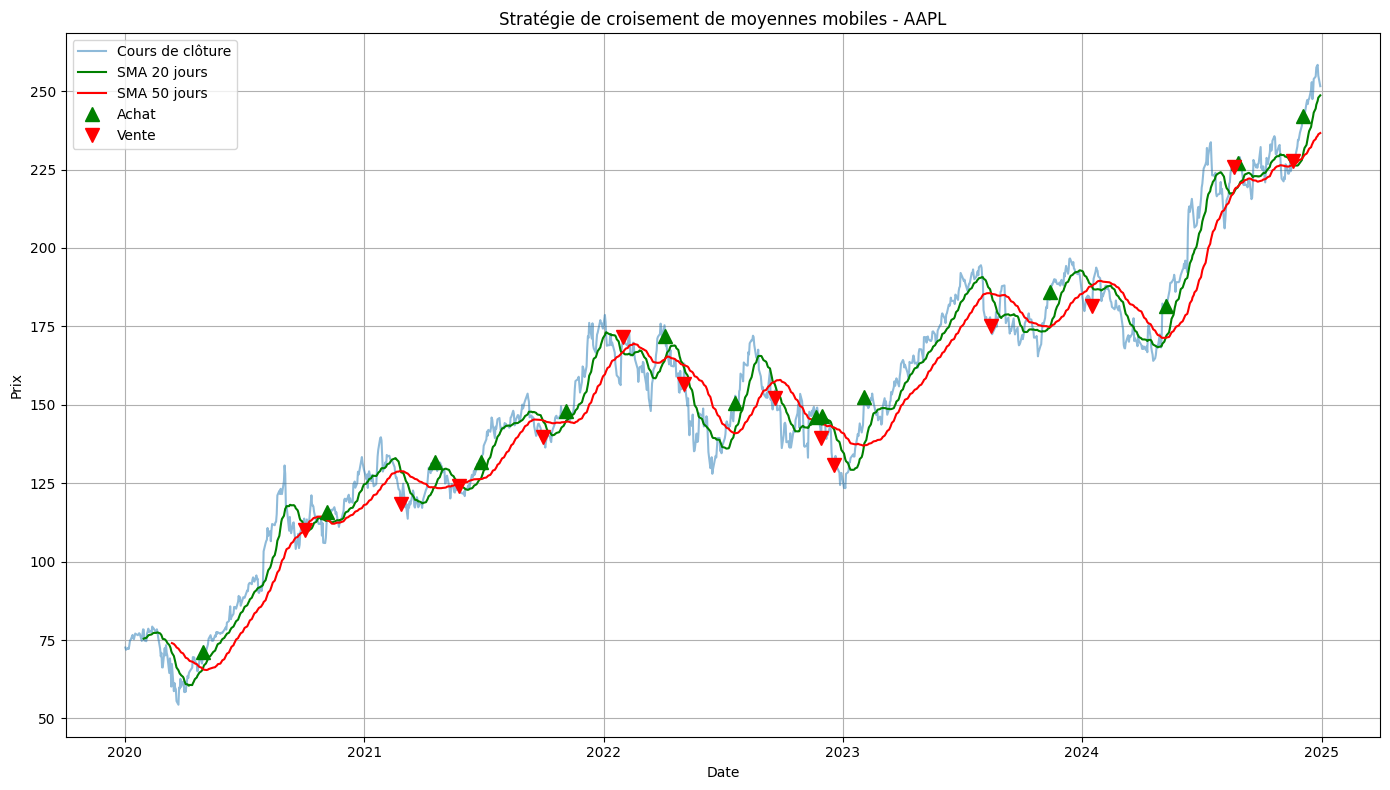

In [ ]:
# 4. Tracer le graphique
plt.figure(figsize=(14, 8))
plt.plot(df['Close'], label='Cours de clôture', alpha=0.5)
plt.plot(df['SMA20'], label='SMA 20 jours', color='green')
plt.plot(df['SMA50'], label='SMA 50 jours', color='red')

# Points d'achat
plt.plot(df[df['Position'] == 1].index, df['Close'][df['Position'] == 1], '^', color='green', markersize=10, label='Achat')

# Points de vente
plt.plot(df[df['Position'] == -1].index, df['Close'][df['Position'] == -1], 'v', color='red', markersize=10, label='Vente')

plt.title("Stratégie de croisement de moyennes mobiles - AAPL")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
!pip install backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import backtrader as bt
# On ne garde que les colonnes nécessaires pour le trading
data = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data.dropna(inplace=True)  # On supprime les lignes incomplètes

# Backtrader préfère les noms de colonnes en minuscules
data.columns = [col.lower() for col in data.columns]

# On remet l'index 'Date' sous forme de colonne pour Backtrader
data.reset_index(inplace=True)
data.reset_index(inplace=True)
data.head()

,index,Date,open,high,low,close,volume
0,0,2020-01-02,71.627100,72.681296,71.373226,72.620850,135480400
1,1,2020-01-03,71.847125,72.676454,71.689965,71.914825,146322800
2,2,2020-01-06,71.034717,72.526541,70.783256,72.487854,118387200
3,3,2020-01-07,72.497514,72.753808,71.926900,72.146927,108872000
4,4,2020-01-08,71.849533,73.609745,71.849533,73.307510,132079200


In [ ]:
# ----------------------------
#  2. Créer un "Data Feed" pour Backtrader
# ----------------------------

# Un "Data Feed", c’est un connecteur entre tes données pandas et Backtrader.
# Il lui explique comment lire la colonne 'Date', 'Open', etc. depuis le DataFrame.
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),        # Indique la colonne utilisée comme date
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),        # Pas utilisé ici, on le désactive avec -1
    )


# ----------------------------
# 📈 3. Créer la stratégie de croisement de moyennes mobiles
# ----------------------------
class SMACrossStrategy(bt.Strategy):
    params = (
        ('sma_short', 20),  # période pour la moyenne mobile courte
        ('sma_long', 50),   # période pour la moyenne mobile longue
    )

    def __init__(self):
        # Calcul des deux moyennes mobiles
        self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        self.sma_long = bt.ind.SMA(period=self.params.sma_long)

        # Détecter les croisements entre les deux SMA (cross up ou down)
        self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)

    def next(self):
        # Cette méthode s’exécute à chaque nouvelle bougie (jour)
        if not self.position:
            # Si on n’a pas de position (ni achat, ni vente)
            if self.crossover > 0:
                self.buy()  # 🟢 Croisement haussier → on achète
        elif self.crossover < 0:
            self.sell()  # 🔴 Croisement baissier → on revend tout



# ----------------------------
# 4. Initialiser Backtrader et ajouter notre stratégie
# ----------------------------
cerebro = bt.Cerebro()  # Le moteur de backtest de Backtrader
cerebro.addstrategy(SMACrossStrategy)  # Ajout de notre stratégie dans le moteur

# Création du "data feed" à partir du DataFrame qu'on a préparé
data_feed = PandasData(dataname=data)

# Ajout des données au moteur de simulation
cerebro.adddata(data_feed)

# Définir le capital initial
cerebro.broker.set_cash(10000.0)

# Affichage du capital avant simulation
print(f"💰 Capital initial : {cerebro.broker.getvalue():.2f} $")

💰 Capital initial : 10000.00 $


In [ ]:
# ----------------------------
# 5. Exécuter la simulation
# ----------------------------
cerebro.run()

# Affichage du capital après simulation
print(f" Capital final : {cerebro.broker.getvalue():.2f} $")

 Capital final : 10110.43 $


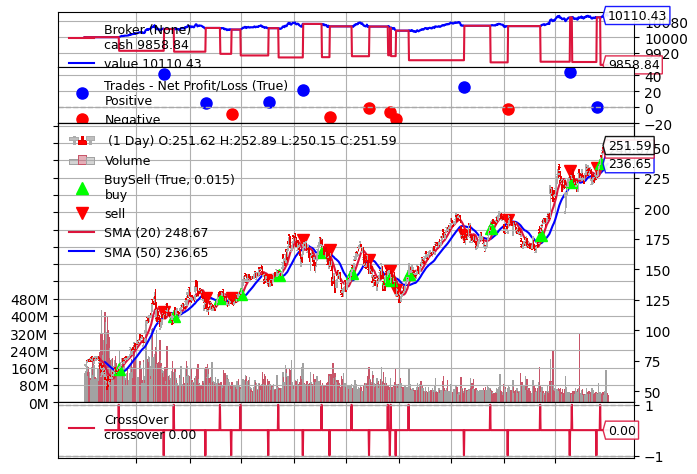

[[<Figure size 640x480 with 5 Axes>]]

In [ ]:
%matplotlib inline

# ----------------------------------
# 6. Afficher le graphique des transactions
# ----------------------------------
# Le graphique montrera :
# - le cours
# - les deux SMA
# - les trades (achats/ventes)
# Affichage propre
import matplotlib.pyplot as plt
# Activation du backend graphique pour VS Code

figs = cerebro.plot(iplot=False, style='candlestick', volume=True)
figs

In [ ]:

# Récupérer le capital initial et final
capital_initial = 10000 # Ou la valeur que tu as utilisée dans set_cash
capital_final = cerebro.broker.getvalue()

# Calcul du rendement
rendement = (capital_final - capital_initial) / capital_initial * 100

print(f"Capital initial : {capital_initial:.2f} $")
print(f"Capital final : {capital_final:.2f} $")
print(f"Rendement total : {rendement:.2f} %")


Capital initial : 10000.00 $
Capital final : 10110.43 $
Rendement total : 1.10 %


In [ ]:
# Option 1 : récupérer l'évolution du portefeuille à chaque step (nécessite une petite modification dans la stratégie)

# Adapter les données pour Backtrader
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),
    )

# Stratégie SMA croisée enrichie
class SMACross(bt.Strategy):
    def __init__(self):
        self.sma1 = bt.ind.SMA(period=20)
        self.sma2 = bt.ind.SMA(period=50)
        self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
        self.portfolio_values = []
        self.trades = []

    def next(self):
        self.portfolio_values.append(self.broker.getvalue())

        if not self.position:
            if self.cross > 0:
                self.buy_price = self.data.close[0]
                self.buy()
        elif self.cross < 0:
            if self.position:
                sell_price = self.data.close[0]
                gain = sell_price - self.buy_price
                self.trades.append(gain)
                self.sell()

    def stop(self):
        # Capital
        capital_initial = cerebro.startingcash
        capital_final = self.broker.getvalue()
        rendement = (capital_final - capital_initial) / capital_initial * 100

        # Drawdown max
        peak = self.portfolio_values[0]
        max_dd = 0
        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val) / peak
            if dd > max_dd:
                max_dd = dd

        # Statistiques sur les trades
        total_trades = len(self.trades)
        winning_trades = len([t for t in self.trades if t > 0])
        losing_trades = total_trades - winning_trades
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        avg_gain = sum(self.trades) / total_trades if total_trades > 0 else 0
        gains = [t for t in self.trades if t > 0]
        losses = [t for t in self.trades if t < 0]
        avg_win = sum(gains) / len(gains) if gains else 0
        avg_loss = abs(sum(losses) / len(losses)) if losses else 0
        gain_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0

        # Affichage des résultats
        print("----- Résultats de la stratégie -----")
        print(f"Capital initial     : {capital_initial:.2f} $")
        print(f"Capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawdown maximal    : {max_dd * 100:.2f} %")
        print(f"Nombre de trades    : {total_trades}")
        print(f"Trades gagnants     : {winning_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate:.2f} %")
        print(f"Gain moyen / trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f}")

# Backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(PandasData(dataname=data))
cerebro.broker.setcash(10000.0)
cerebro.startingcash = 10000.0

cerebro.run()


----- Résultats de la stratégie -----
Capital initial     : 10000.00 $
Capital final       : 10110.43 $
Rendement total     : 1.10 %
Drawdown maximal    : 0.49 %
Nombre de trades    : 13
Trades gagnants     : 8
Trades perdants     : 5
Taux de réussite    : 61.54 %
Gain moyen / trade  : 7.04 $
Ratio gain/perte    : 1.77


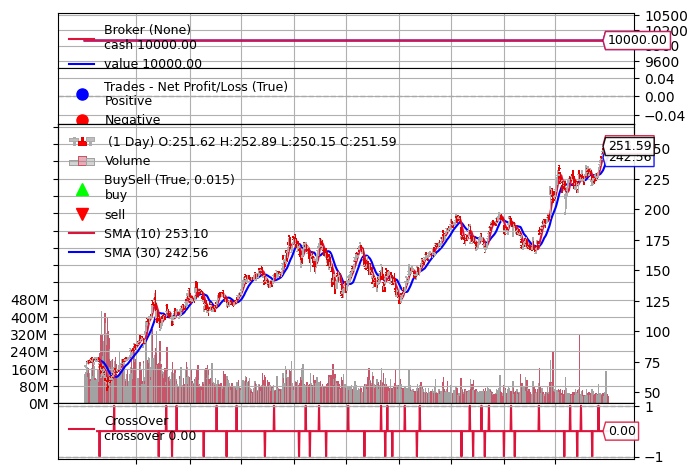

[[<Figure size 640x480 with 5 Axes>]]

In [ ]:
%matplotlib inline

# Adapter les données pour Backtrader
class PandasData(bt.feeds.PandasData):
  params = (
      ('datetime', 'Date'),
      ('open', 'open'),
      ('high', 'high'),
      ('low', 'low'),
      ('close', 'close'),
      ('volume', 'volume'),
      ('openinterest', -1),
  )

# Statégie SMA(10) / SMA(30)
class SMACross(bt.Strategy):
  def __init__(self):
    self.sma1 = bt.ind.SMA(period=10)
    self.sma2 = bt.ind.SMA(period=30)
    self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
    self.portfolio_values = []
    self.trades = []

    def next(self):
      self.portfolio_values.append(self.broker.getvalue())

      if not self.position:
        if self.cross > 0:
            self.buy_price = self.data.close[0]
            self.buy()
      elif self.cross < 0:
        if self.position:
            sell_price = self.data.close[0]
            gain = sell_price - self.buy_price
            self.trades.append(gain)
            self.sell()

    def stop(self):
        # Capital
        capital_initial = cerebro.startingcash
        capital_final = self.broker.getvalue()
        rendement = (capital_final - capital_initial) / capital_initial * 100

        # Drawdown max
        peak = self.portfolio_values[0]
        max_dd = 0
        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val) / peak
            if dd > max_dd:
                max_dd = dd

        total_trades = len(self.trades)
        winning_trades = len([t for t in self.trades if t > 0])
        losing_trades = total_trades - winning_trades
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        avg_gain = sum(self.trades) / total_trades if total_trades > 0 else 0
        gains = [t for t in self.trades if t > 0]
        losses = [t for t in self.trades if t < 0]
        avg_win = sum(gains) / len(gains) if gains else 0
        avg_loss = abs(sum(losses) / len(losses)) if losses else 0
        gain_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0

        print("----- Résultats de la stratégie -----")
        print(f"Capital initial     : {capital_initial:.2f} $")
        print(f"Capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawdown maximal    : {max_dd * 100:.2f} %")
        print(f"Nombre de trades    : {total_trades}")
        print("Trades gagnants     : {winning_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate:.2f} %")
        print(f"Gain moyen / trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f}")

# Lancer le backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(PandasData(dataname=data))
cerebro.broker.setcash(10000.0)
cerebro.startingcash = 10000.0

cerebro.run()
cerebro.plot(iplot=False, style='candlestick', volume=True)


----- Résultats de la stratégie SMA(10)/SMA(30) -----
Capital initial     : 10000.00 $
Capital final       : 10102.82 $
Rendement total     : 1.03 %
Drawdown maximal    : 0.45 %
Nombre de trades    : 20
Trades gagnants     : 9
Trades perdants     : 11
Taux de réussite    : 45.00 %
Gain moyen / trade  : 3.94 $
Ratio gain/perte    : 2.31


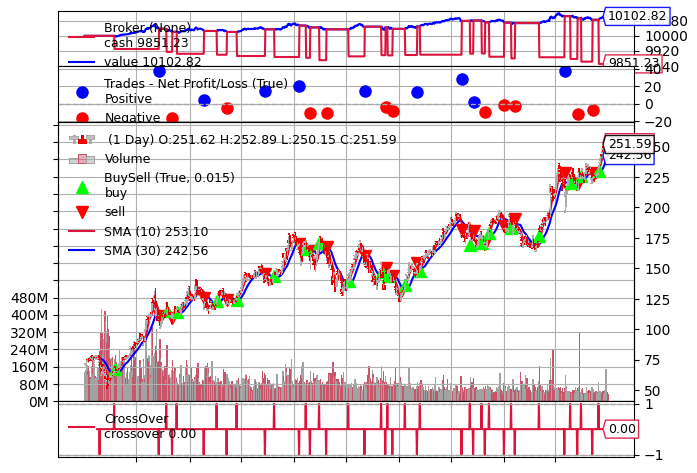

[[<Figure size 640x480 with 5 Axes>]]

In [ ]:

# Adapter les données pour Backtrader
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),
    )

# Stratégie SMA(10) / SMA(30)
class SMACross(bt.Strategy):
    def __init__(self):
        self.sma1 = bt.ind.SMA(period=10)  # SMA courte
        self.sma2 = bt.ind.SMA(period=30)  # SMA longue
        self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
        self.portfolio_values = []
        self.trades = []

    def next(self):
        self.portfolio_values.append(self.broker.getvalue())

        if not self.position:
            if self.cross > 0:
                self.buy_price = self.data.close[0]
                self.buy()
        elif self.cross < 0:
            if self.position:
                sell_price = self.data.close[0]
                gain = sell_price - self.buy_price
                self.trades.append(gain)
                self.sell()

    def stop(self):
        capital_initial = cerebro.startingcash
        capital_final = self.broker.getvalue()
        rendement = (capital_final - capital_initial) / capital_initial * 100

        peak = self.portfolio_values[0]
        max_dd = 0
        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val) / peak
            if dd > max_dd:
                max_dd = dd

        total_trades = len(self.trades)
        winning_trades = len([t for t in self.trades if t > 0])
        losing_trades = total_trades - winning_trades
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        avg_gain = sum(self.trades) / total_trades if total_trades > 0 else 0
        gains = [t for t in self.trades if t > 0]
        losses = [t for t in self.trades if t < 0]
        avg_win = sum(gains) / len(gains) if gains else 0
        avg_loss = abs(sum(losses) / len(losses)) if losses else 0
        gain_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0

        print("----- Résultats de la stratégie SMA(10)/SMA(30) -----")
        print(f"Capital initial     : {capital_initial:.2f} $")
        print(f"Capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawdown maximal    : {max_dd * 100:.2f} %")
        print(f"Nombre de trades    : {total_trades}")
        print(f"Trades gagnants     : {winning_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate:.2f} %")
        print(f"Gain moyen / trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f}")

# Lancer le backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(PandasData(dataname=data))
cerebro.broker.setcash(10000.0)
cerebro.startingcash = 10000.0

cerebro.run()
cerebro.plot(iplot=False, style='candlestick', volume=True)